<a href="https://colab.research.google.com/github/merazlab/tensorflow/blob/master/Basic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [0]:
num_samples, w, b = 20, 0.5, 2.0
xs = np.asarray(range(num_samples))
ys = np.asarray([x*w + b + np.random.normal() for x in range(num_samples)])

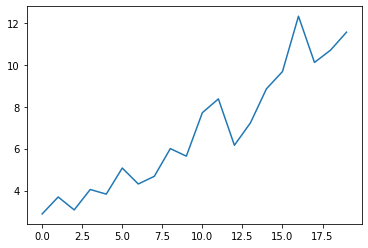

In [4]:
plt.plot(xs, ys)

In [0]:
class Linear(object):
    def __init__(self):
        self.w = tf.get_variable("w", dtype=tf.float32, shape=[], initializer=tf.zeros_initializer())
        self.b = tf.get_variable("b", dtype=tf.float32, shape=[], initializer=tf.zeros_initializer())

    def __call__(self, x):
        return self.w *x + self.b

In [0]:
xtf = tf.placeholder(tf.float32, [num_samples], "xs")
ytf = tf.placeholder(tf.float32, [num_samples], "ys")

model = Linear()
model_output = model(xtf)

cov = tf.reduce_sum((xtf - tf.reduce_mean(xtf)) * (ytf - tf.reduce_mean(ytf)))
var = tf.reduce_sum(tf.square(xtf-tf.reduce_mean(xtf)))
w_hat = cov / var
b_hat = tf.reduce_mean(ytf) - w_hat*tf.reduce_mean(xtf)

solve_w = model.w.assign(w_hat)
solve_b = model.b.assign(tf.reduce_mean(ytf) - w_hat*tf.reduce_mean(xtf))


In [7]:
with tf.train.MonitoredSession() as sess:
    sess.run(
        [solve_w, solve_b], feed_dict = {xtf: xs, ytf: ys}
    )
    preds = sess.run(model_output, feed_dict = {xtf: xs, ytf: ys} )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


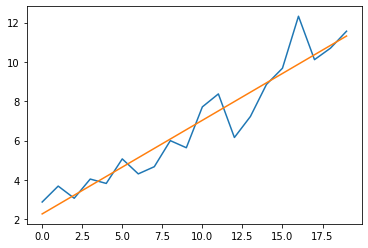

In [8]:
plt.plot(xs, ys)
plt.plot(xs, preds)

In [0]:
loss = tf.losses.mean_squared_error(ytf, model_output)
grads = tf.gradients(loss, [model.w, model.b])

update_w = tf.assign(model.w, model.w -0.001*grads[0])
update_b = tf.assign(model.b, model.b -0.001*grads[1])

update = tf.group(update_w, update_b)

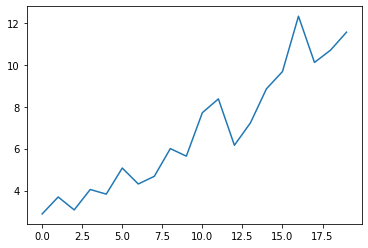

In [16]:
plt.plot(xs, ys)
feed_dict = {'xs_tf': xs, 'ys_tf': ys}


In [17]:
with tf.train.MonitoredSession() as sess:
    for i in range(500):
        sess.run(update, feed_dict=feed_dict)
    # if i in [1, 5, 25, 125, 499]:
    #     preds = sess.run(model_output, feed_dict=feed_dict)
    # plt.plot(xs, preds, labeb= str(i))
# plt.plt(xs, preds, labeb= str(i))
# plt.legend()

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


TypeError: ignored

#Control dependices

In [3]:
x = tf.get_variable("x", shape=(), initializer= tf.zeros_initializer())
assign_x = tf.assign(x, 10.0)
z = x+ 1.0

with tf.train.MonitoredSession() as session:
    print(session.run(z))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
1.0


In [0]:
tf.reset_default_graph() 

In [6]:
x = tf.get_variable("x", shape=(), initializer= tf.zeros_initializer())
assign_x = tf.assign(x, 10.0)
z = x+ 1.0

with tf.train.MonitoredSession() as session:
    print(session.run([assign_x, z])) #value not a deterministic

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[10.0, 11.0]


In [0]:
tf.reset_default_graph() 

In [14]:
tf.reset_default_graph() 
x = tf.get_variable("x", shape=(), initializer= tf.zeros_initializer())
assign_x = tf.assign(x, 10.0)

with tf.control_dependencies([assign_x]):
    z = x + 1.0
with tf.train.MonitoredSession() as session:
    print(session.run(z)) #deterministic value

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
11.0
